#Курсовая работа
Дисциплина: "Наука о данных и аналитика больших объемов информации" \
*Выполнили: Малашенко М., Середин Е., Рублева А.* \
*Группа: 3740105/30101* \#Курсовая - v2

##Начало

In [ ]:
#импорт библиотек
import pandas as pd
from glob import glob
import glob
import os
import numpy as np

In [ ]:
#создание датафрейма - объединение данных из всех файлов
df = pd.concat(map(pd.read_csv, glob.glob(os.path.join('/content', 'Saint-Petersburg*.csv'))), ignore_index= True)
print("Размер датасета:", df.shape)
df.head()

Размер датасета: (8833, 33)


,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Saint Petersburg,2006-01-01,2.1,0.1,0.9,1.9,-5.4,-2.7,-1.6,83.9,...,NaN,NaN,NaN,2006-01-01T10:00:37,2006-01-01T16:04:10,0.04,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,26063099999
1,Saint Petersburg,2006-01-02,1.7,0.1,0.7,-1.1,-5.4,-3.9,-1.0,88.7,...,NaN,NaN,NaN,2006-01-02T10:00:07,2006-01-02T16:05:37,0.08,"Snow, Rain, Overcast",Cloudy skies throughout the day with a chance ...,snow,26063099999
2,Saint Petersburg,2006-01-03,1.1,0.1,0.3,1.1,-3.9,-1.0,-0.4,95.2,...,NaN,NaN,NaN,2006-01-03T09:59:31,2006-01-03T16:07:10,0.11,"Snow, Rain, Overcast",Cloudy skies throughout the day with a chance ...,snow,26063099999
3,Saint Petersburg,2006-01-04,0.7,-0.9,0.1,0.7,-2.4,-0.1,-1.0,92.8,...,NaN,NaN,NaN,2006-01-04T09:58:51,2006-01-04T16:08:46,0.15,"Snow, Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,26063099999
4,Saint Petersburg,2006-01-05,0.1,-1.9,-1.1,0.1,-4.7,-2.2,-3.0,86.6,...,NaN,NaN,NaN,2006-01-05T09:58:06,2006-01-05T16:10:27,0.18,"Snow, Rain, Overcast",Cloudy skies throughout the day with rain or s...,rain,26063099999


In [ ]:
# посмотрим на основные статистические показатели (summary statistics)
df.describe().round(2)

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
count,8833.00,8833.00,8833.00,8833.00,8833.00,8833.00,8833.00,8833.00,8833.00,8833.00,...,8833.00,8833.00,8831.00,8833.00,8833.00,5176.00,5176.00,5176.00,778.00,8833.00
mean,9.56,2.35,6.14,8.39,-0.60,4.05,2.04,77.59,10.68,59.38,...,21.72,200.19,1012.69,76.16,9.19,111.32,9.60,3.49,10.08,0.48
std,10.53,9.25,9.73,11.60,11.41,11.50,8.76,12.41,56.50,49.08,...,7.65,88.03,11.09,24.25,1.70,99.13,8.57,2.57,1.24,0.29
min,-23.50,-30.90,-26.80,-31.80,-41.10,-36.60,-30.00,29.80,0.00,0.00,...,3.60,0.80,969.30,0.00,0.20,0.00,0.00,0.00,10.00,0.00
25%,1.40,-3.00,-0.40,-0.70,-7.90,-4.00,-3.40,70.10,0.00,0.00,...,18.00,127.90,1005.90,62.30,8.50,18.20,1.50,1.00,10.00,0.25
50%,9.00,2.10,5.90,7.30,-0.60,3.70,1.70,80.20,0.30,100.00,...,21.60,216.10,1012.80,84.00,9.80,84.60,7.30,3.00,10.00,0.48
75%,18.30,10.00,14.30,18.30,9.10,14.30,9.20,87.20,2.56,100.00,...,25.20,274.70,1019.55,96.40,10.30,190.12,16.40,6.00,10.00,0.75
max,36.80,23.00,29.20,36.90,23.00,29.10,20.50,99.80,861.10,100.00,...,90.00,360.00,1056.60,100.00,24.10,358.90,30.90,9.00,30.00,0.98


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8833 entries, 0 to 8832
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              8833 non-null   object 
 1   datetime          8833 non-null   object 
 2   tempmax           8833 non-null   float64
 3   tempmin           8833 non-null   float64
 4   temp              8833 non-null   float64
 5   feelslikemax      8833 non-null   float64
 6   feelslikemin      8833 non-null   float64
 7   feelslike         8833 non-null   float64
 8   dew               8833 non-null   float64
 9   humidity          8833 non-null   float64
 10  precip            8833 non-null   float64
 11  precipprob        8833 non-null   float64
 12  precipcover       8833 non-null   float64
 13  preciptype        5480 non-null   object 
 14  snow              8101 non-null   float64
 15  snowdepth         8337 non-null   float64
 16  windgust          3663 non-null   float64


##Сортировка данных по дате

In [ ]:
#проверка типа данных
print(type(df.datetime[0]))

#преобразование в дату
df['datetime'] = pd.to_datetime(df['datetime'])

#проверка типа данных
print(type(df.datetime[0]))

<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
df['datetime']

0      2006-01-01
1      2006-01-02
2      2006-01-03
3      2006-01-04
4      2006-01-05
          ...    
8828   2022-08-28
8829   2022-08-29
8830   2022-08-30
8831   2022-08-31
8832   2022-09-01
Name: datetime, Length: 8833, dtype: datetime64[ns]

In [ ]:
#сортировка фрейма данных по дате
df = df.sort_values(by='datetime')
df.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
2737,Saint-Petersburg,2000-01-01,-6.6,-9.6,-8.2,-6.6,-14.3,-10.7,-10.3,84.7,...,NaN,NaN,NaN,2000-01-01T10:00:50,2000-01-01T16:03:26,0.82,"Snow, Overcast",Cloudy skies throughout the day with morning s...,snow,26063099999
2738,Saint-Petersburg,2000-01-02,-6.3,-10.9,-8.1,-6.3,-16.7,-12.5,-10.4,83.5,...,NaN,NaN,NaN,2000-01-02T10:00:23,2000-01-02T16:04:52,0.85,"Snow, Overcast",Cloudy skies throughout the day with snow.,snow,26063099999
2739,Saint-Petersburg,2000-01-03,-7.3,-10.9,-8.6,-11.0,-19.3,-14.9,-11.0,83.1,...,NaN,NaN,NaN,2000-01-03T09:59:50,2000-01-03T16:06:21,0.89,"Snow, Overcast",Cloudy skies throughout the day with snow.,snow,26063099999
2740,Saint-Petersburg,2000-01-04,1.9,-7.9,-3.4,-2.0,-15.5,-8.8,-4.7,90.2,...,NaN,NaN,NaN,2000-01-04T09:59:12,2000-01-04T16:07:56,0.92,"Snow, Rain, Overcast",Cloudy skies throughout the day with late afte...,rain,26063099999
2741,Saint-Petersburg,2000-01-05,2.2,0.9,1.4,-1.1,-5.0,-3.2,-0.5,87.8,...,NaN,NaN,NaN,2000-01-05T09:58:30,2000-01-05T16:09:34,0.95,"Snow, Rain, Overcast",Cloudy skies throughout the day with rain or s...,rain,26063099999


##Дубликаты

In [ ]:
# Определим дубликаты
print('Дубликаты в массиве:', df.duplicated().sum())
print('Идентичные строки:',df.duplicated(keep=False).sum())

Дубликаты в массиве: 6
Идентичные строки: 12


In [ ]:
print("Duplicate Rows :")
df.duplicated().head(10)

Duplicate Rows :


2737    False
2738    False
2739    False
2740    False
2741    False
2742    False
2743    False
2744    False
2745    False
2746    False
dtype: bool

In [ ]:
# Удалим найденные дубликаты
df = df.drop_duplicates().reset_index(drop=True)

# И выполним проверку
print('Дубликаты в массиве:', df.duplicated().sum())
print('Идентичные строки:',df.duplicated(keep=False).sum())

Дубликаты в массиве: 0
Идентичные строки: 0


##Пропуски

In [ ]:
#есть ли пропущенные значения
df.isnull().any()

name                False
datetime            False
tempmax             False
tempmin             False
temp                False
feelslikemax        False
feelslikemin        False
feelslike           False
dew                 False
humidity            False
precip              False
precipprob          False
precipcover         False
preciptype           True
snow                 True
snowdepth            True
windgust             True
windspeed           False
winddir             False
sealevelpressure     True
cloudcover          False
visibility          False
solarradiation       True
solarenergy          True
uvindex              True
severerisk           True
sunrise             False
sunset              False
moonphase           False
conditions          False
description         False
icon                False
stations             True
dtype: bool

In [ ]:
#выясним долю пропусков в каждом столбце
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100, 3)))

name - 0.0%
datetime - 0.0%
tempmax - 0.0%
tempmin - 0.0%
temp - 0.0%
feelslikemax - 0.0%
feelslikemin - 0.0%
feelslike - 0.0%
dew - 0.0%
humidity - 0.0%
precip - 0.0%
precipprob - 0.0%
precipcover - 0.0%
preciptype - 37.963%
snow - 8.293%
snowdepth - 5.619%
windgust - 58.548%
windspeed - 0.0%
winddir - 0.0%
sealevelpressure - 0.023%
cloudcover - 0.0%
visibility - 0.0%
solarradiation - 41.418%
solarenergy - 41.418%
uvindex - 41.418%
severerisk - 91.197%
sunrise - 0.0%
sunset - 0.0%
moonphase - 0.0%
conditions - 0.0%
description - 0.0%
icon - 0.0%
stations - 0.159%


In [ ]:
#общее кол-во пропусков
df.isnull().sum().sum()

28781

In [ ]:
# Выбираем только числовые столбцы из исходного DataFrame
df_numeric = df.select_dtypes(include='number')

# Получаем список столбцов нового DataFrame
numeric_columns = df_numeric.columns.tolist()

# Печатаем список столбцов нового DataFrame
print("Столбцы в новом DataFrame с числовыми данными:", numeric_columns)

Столбцы в новом DataFrame с числовыми данными: ['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'moonphase']


In [ ]:
# вставляем отсутствующие значения и создаем переменные индикатора отсутствующих значений для каждого числового столбца
numeric_cols = df_numeric.columns.values

for col in numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)

    if num_missing > 0:  # выполнять заполнение только для столбцов с пропущенными значениями
        print('вставка пропущенных значений для: {}'.format(col))
        med = df[col].median()
        df[col] = df[col].fillna(med)

вставка пропущенных значений для: snow
вставка пропущенных значений для: snowdepth
вставка пропущенных значений для: windgust
вставка пропущенных значений для: sealevelpressure
вставка пропущенных значений для: solarradiation
вставка пропущенных значений для: solarenergy
вставка пропущенных значений для: uvindex
вставка пропущенных значений для: severerisk


In [ ]:
#выясним долю пропусков в каждом столбце
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100, 3)))

name - 0.0%
datetime - 0.0%
tempmax - 0.0%
tempmin - 0.0%
temp - 0.0%
feelslikemax - 0.0%
feelslikemin - 0.0%
feelslike - 0.0%
dew - 0.0%
humidity - 0.0%
precip - 0.0%
precipprob - 0.0%
precipcover - 0.0%
preciptype - 37.963%
snow - 0.0%
snowdepth - 0.0%
windgust - 0.0%
windspeed - 0.0%
winddir - 0.0%
sealevelpressure - 0.0%
cloudcover - 0.0%
visibility - 0.0%
solarradiation - 0.0%
solarenergy - 0.0%
uvindex - 0.0%
severerisk - 0.0%
sunrise - 0.0%
sunset - 0.0%
moonphase - 0.0%
conditions - 0.0%
description - 0.0%
icon - 0.0%
stations - 0.159%


In [ ]:
df.isnull().sum().sum()

3365

In [ ]:
print("Размер датасета:", df.shape)
df

Размер датасета: (8827, 33)


,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Saint-Petersburg,2000-01-01,-6.6,-9.6,-8.2,-6.6,-14.3,-10.7,-10.3,84.7,...,7.3,3.0,10.0,2000-01-01T10:00:50,2000-01-01T16:03:26,0.82,"Snow, Overcast",Cloudy skies throughout the day with morning s...,snow,26063099999
1,Saint-Petersburg,2000-01-02,-6.3,-10.9,-8.1,-6.3,-16.7,-12.5,-10.4,83.5,...,7.3,3.0,10.0,2000-01-02T10:00:23,2000-01-02T16:04:52,0.85,"Snow, Overcast",Cloudy skies throughout the day with snow.,snow,26063099999
2,Saint-Petersburg,2000-01-03,-7.3,-10.9,-8.6,-11.0,-19.3,-14.9,-11.0,83.1,...,7.3,3.0,10.0,2000-01-03T09:59:50,2000-01-03T16:06:21,0.89,"Snow, Overcast",Cloudy skies throughout the day with snow.,snow,26063099999
3,Saint-Petersburg,2000-01-04,1.9,-7.9,-3.4,-2.0,-15.5,-8.8,-4.7,90.2,...,7.3,3.0,10.0,2000-01-04T09:59:12,2000-01-04T16:07:56,0.92,"Snow, Rain, Overcast",Cloudy skies throughout the day with late afte...,rain,26063099999
4,Saint-Petersburg,2000-01-05,2.2,0.9,1.4,-1.1,-5.0,-3.2,-0.5,87.8,...,7.3,3.0,10.0,2000-01-05T09:58:30,2000-01-05T16:09:34,0.95,"Snow, Rain, Overcast",Cloudy skies throughout the day with rain or s...,rain,26063099999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8822,Saint Petersburg,2024-02-21,-8.7,-19.0,-13.0,-15.5,-24.6,-18.6,-15.2,83.7,...,6.5,3.0,10.0,2024-02-21T08:21:51,2024-02-21T18:04:13,0.39,"Snow, Partially cloudy",Partly cloudy throughout the day with early mo...,snow,NaN
8823,Saint Petersburg,2024-02-22,-2.6,-8.5,-5.2,-7.8,-15.2,-11.0,-7.1,86.6,...,3.6,2.0,10.0,2024-02-22T08:19:03,2024-02-22T18:06:48,0.43,Overcast,Cloudy skies throughout the day.,cloudy,NaN
8824,Saint Petersburg,2024-02-23,1.9,-4.3,-1.0,-3.6,-10.6,-6.8,-2.7,88.6,...,2.3,1.0,10.0,2024-02-23T08:16:13,2024-02-23T18:09:23,0.46,Overcast,Cloudy skies throughout the day.,cloudy,NaN
8825,Saint Petersburg,2024-02-24,2.0,0.2,0.9,-2.1,-4.0,-3.5,0.7,98.6,...,0.9,0.0,10.0,2024-02-24T08:13:23,2024-02-24T18:11:57,0.50,Overcast,Cloudy skies throughout the day.,fog,NaN


In [ ]:
df.to_excel("output.xlsx")

In [ ]:
df.to_csv('file.csv')

##Анализ сезонных изменений в температуре

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Создание копии исходного датафрейма
df_1 = df.copy()

In [ ]:
df_2 = df.copy()

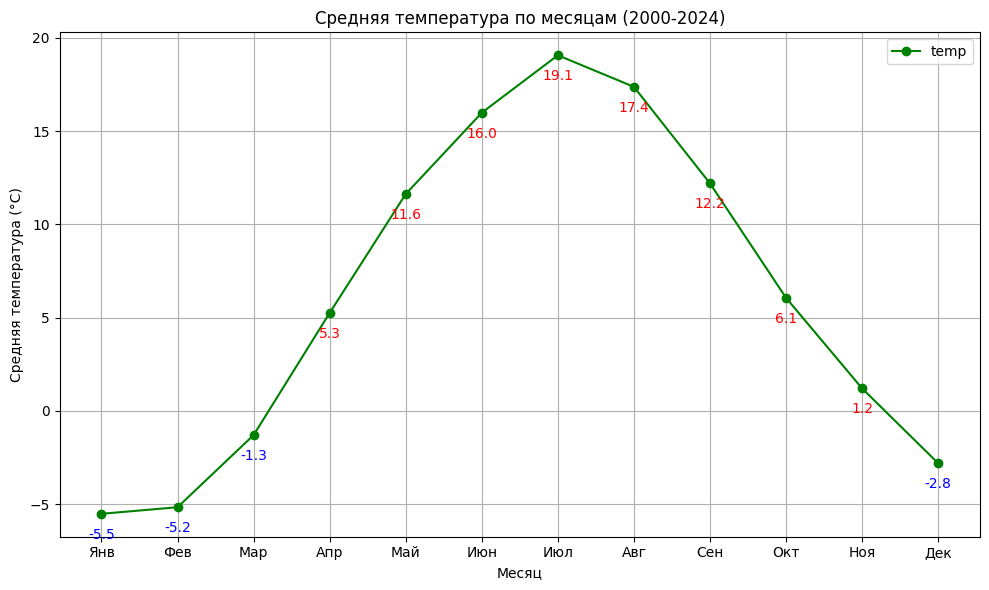

In [ ]:
# Извлечение месяца из столбца datetime
df['month'] = df['datetime'].dt.month

# Группировка данных по месяцам и вычисление средней температуры
# для каждого месяца
mean_temp_by_month = df.groupby('month')['temp'].mean()

# Визуализация средней температуры по месяцам
plt.figure(figsize=(10, 6))
mean_temp_by_month.plot(marker='o', color='green')
plt.title('Средняя температура по месяцам (2000-2024)')
plt.xlabel('Месяц')
plt.ylabel('Средняя температура (°C)')
plt.xticks(np.arange(1, 13), ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек'])


# Вывод числовых результатов на графике
for month, temp in enumerate(mean_temp_by_month, start=1):
    # Определение цвета текста в зависимости от знака температуры
    text_color = 'red' if temp >= 0 else 'blue'
    # Определение смещения текста относительно точки
    text_offset = -1.5
    # Вывод текста
    plt.text(month, temp + text_offset, f'{temp:.1f}', ha='center', va='bottom', color=text_color)

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

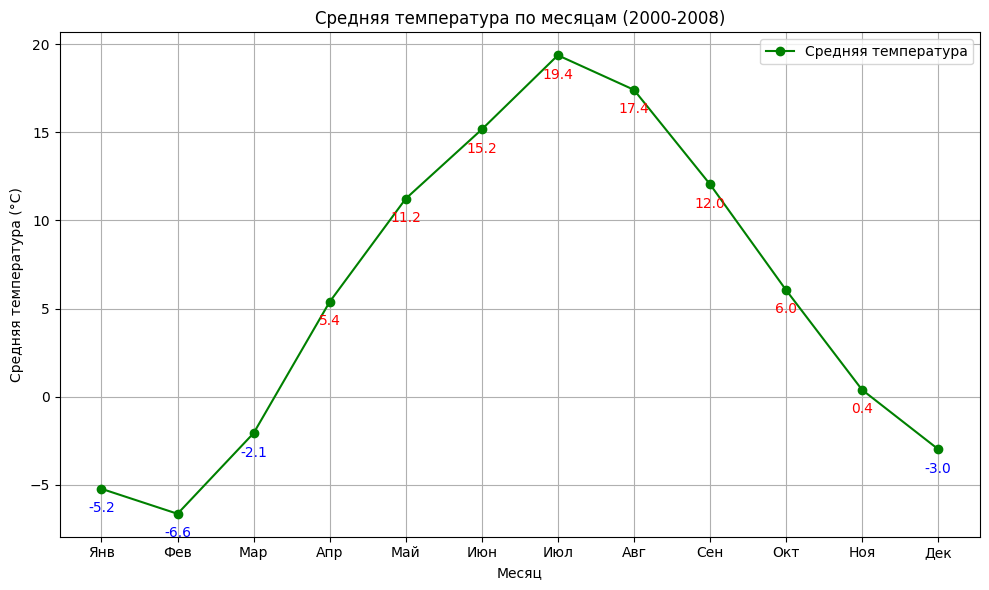

In [ ]:
# Фильтрация данных по периоду с 1 января 2000 года по 1 января 2008 года
filtered_data = df_1.loc['2000-01-01':'2008-01-01']

# Создание графика
plt.figure(figsize=(10, 6))
filtered_data['temp'].groupby(filtered_data.index.month).mean().plot(marker='o',
                                    color='green', label='Средняя температура')
plt.title('Средняя температура по месяцам (2000-2008)')
plt.xlabel('Месяц')
plt.ylabel('Средняя температура (°C)')
plt.xticks(np.arange(1, 13), ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 'Июл',
                              'Авг', 'Сен', 'Окт', 'Ноя', 'Дек'])
plt.grid(True)

# Вывод числовых результатов на графике
for month, temp in enumerate(filtered_data['temp'].groupby(filtered_data.index.month).mean(), start=1):
    # Определение цвета текста в зависимости от знака температуры
    text_color = 'red' if temp >= 0 else 'blue'
    # Определение смещения текста относительно точки
    text_offset = -1.5
    # Вывод текста
    plt.text(month, temp + text_offset, f'{temp:.1f}', ha='center', va='bottom', color=text_color)

plt.legend()
plt.tight_layout()
plt.show()


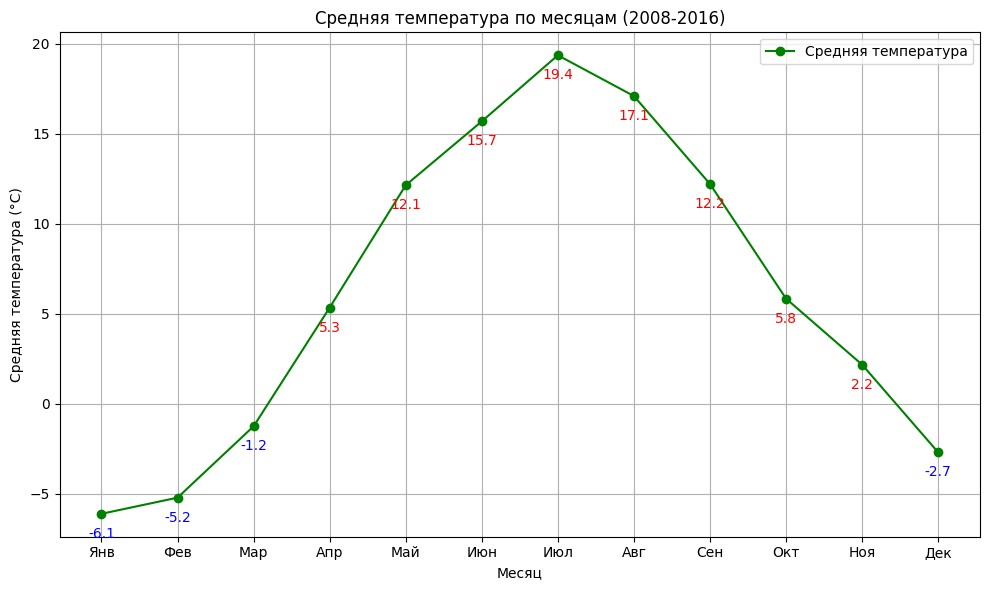

In [ ]:
# Фильтрация данных по периоду с 1 января 2008 года по 1 января 2016 года
filtered_data = df_1.loc['2008-01-01':'2016-01-01']

# Создание графика
plt.figure(figsize=(10, 6))
filtered_data['temp'].groupby(filtered_data.index.month).mean().plot(marker='o', color='green', label='Средняя температура')
plt.title('Средняя температура по месяцам (2008-2016)')
plt.xlabel('Месяц')
plt.ylabel('Средняя температура (°C)')
plt.xticks(np.arange(1, 13), ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек'])
plt.grid(True)

# Вывод числовых результатов на графике
for month, temp in enumerate(filtered_data['temp'].groupby(filtered_data.index.month).mean(), start=1):
    # Определение цвета текста в зависимости от знака температуры
    text_color = 'red' if temp >= 0 else 'blue'
    # Определение смещения текста относительно точки
    text_offset = -1.5
    # Вывод текста
    plt.text(month, temp + text_offset, f'{temp:.1f}', ha='center', va='bottom', color=text_color)

plt.legend()
plt.tight_layout()
plt.show()


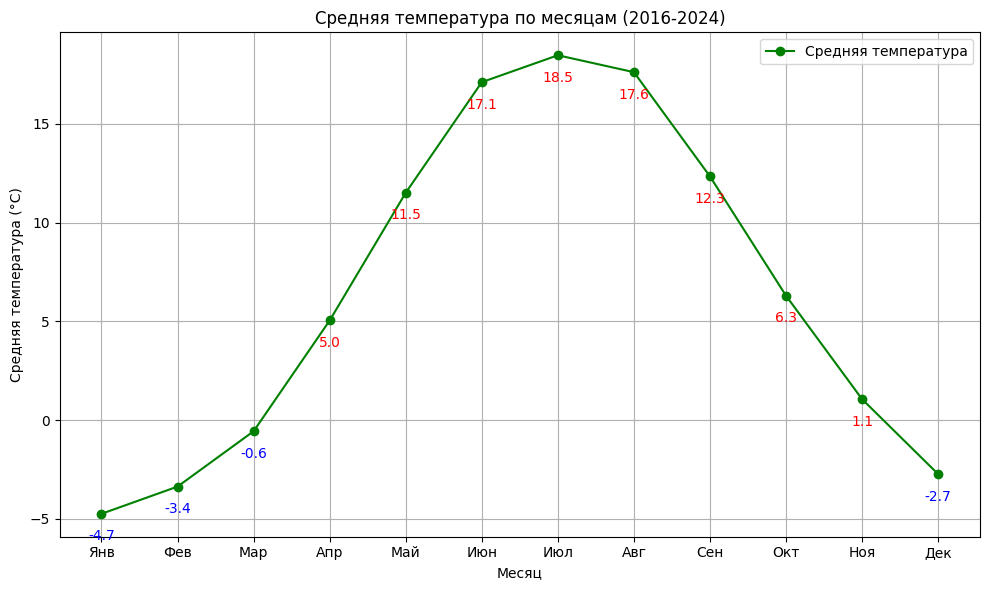

In [ ]:
# Фильтрация данных по периоду с 1 января 2016 года по 1 января 2024 года
filtered_data = df_1.loc['2016-01-01':'2024-01-01']

# Создание графика
plt.figure(figsize=(10, 6))
filtered_data['temp'].groupby(filtered_data.index.month).mean().plot(marker='o', color='green', label='Средняя температура')
plt.title('Средняя температура по месяцам (2016-2024)')
plt.xlabel('Месяц')
plt.ylabel('Средняя температура (°C)')
plt.xticks(np.arange(1, 13), ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек'])
plt.grid(True)

# Вывод числовых результатов на графике
for month, temp in enumerate(filtered_data['temp'].groupby(filtered_data.index.month).mean(), start=1):
    # Определение цвета текста в зависимости от знака температуры
    text_color = 'red' if temp >= 0 else 'blue'
    # Определение смещения текста относительно точки
    text_offset = -1.5
    # Вывод текста
    plt.text(month, temp + text_offset, f'{temp:.1f}', ha='center', va='bottom', color=text_color)

plt.legend()
plt.tight_layout()
plt.show()


## Изучение влияния ветра на погодные условия

In [ ]:
pip install windrose

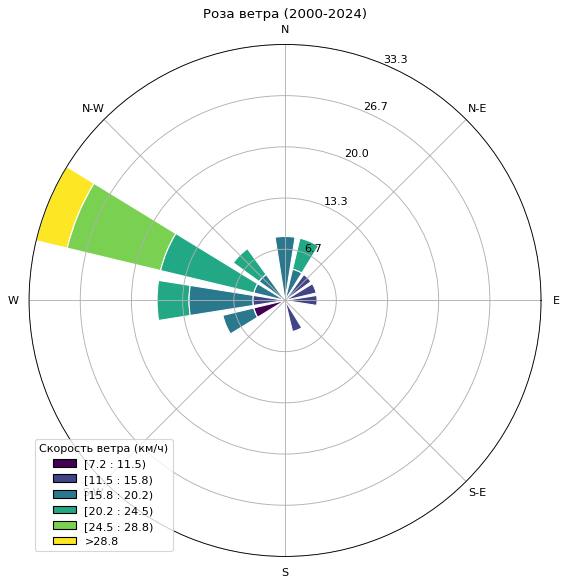

In [ ]:
from windrose import WindroseAxes
import matplotlib.pyplot as plt

# Фильтрация данных по периоду с 1 января 2000 года по 1 января 2008 года
filtered_wind_data = wind_data.loc['2000-01-01':'2024-01-01']

# Создание нового графика с розой ветра
ax = WindroseAxes.from_ax()
ax.bar(filtered_wind_data['winddir'], filtered_wind_data['windspeed'],
       normed=True, opening=0.8, edgecolor='white')

# Добавление легенды
ax.legend(title='Скорость ветра (км/ч)')

# Отображение розы ветра
plt.title('Роза ветра (2000-2024)')
plt.show()


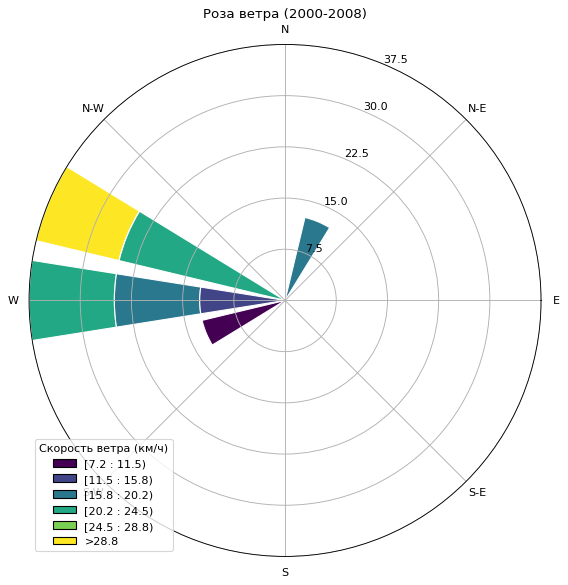

In [ ]:
from windrose import WindroseAxes
import matplotlib.pyplot as plt

# Фильтрация данных по периоду с 1 января 2000 года по 1 января 2008 года
filtered_wind_data = wind_data.loc['2000-01-01':'2008-01-01']

# Создание нового графика с розой ветра
ax = WindroseAxes.from_ax()
ax.bar(filtered_wind_data['winddir'], filtered_wind_data['windspeed'], normed=True, opening=0.8, edgecolor='white')

# Добавление легенды
ax.legend(title='Скорость ветра (км/ч)')

# Отображение розы ветра
plt.title('Роза ветра (2000-2008)')
plt.show()


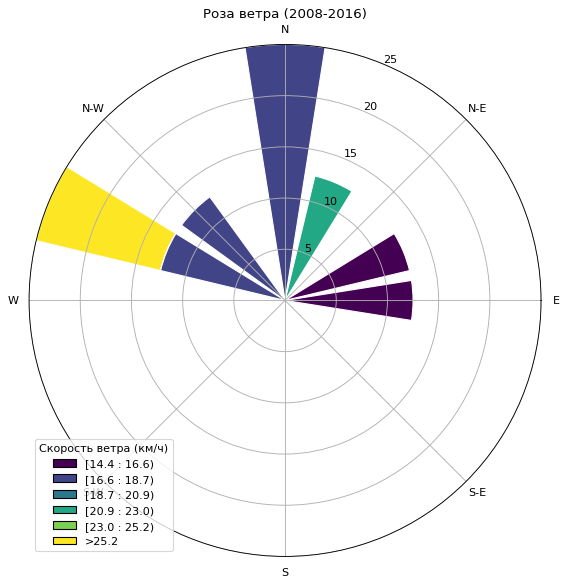

In [ ]:
from windrose import WindroseAxes
import matplotlib.pyplot as plt

# Фильтрация данных по периоду с 1 января 2008 года по 1 января 2016 года
filtered_wind_data = wind_data.loc['2008-01-01':'2016-01-01']

# Создание нового графика с розой ветра
ax = WindroseAxes.from_ax()
ax.bar(filtered_wind_data['winddir'], filtered_wind_data['windspeed'], normed=True, opening=0.8, edgecolor='white')

# Добавление легенды
ax.legend(title='Скорость ветра (км/ч)')

# Отображение розы ветра
plt.title('Роза ветра (2008-2016)')
plt.show()


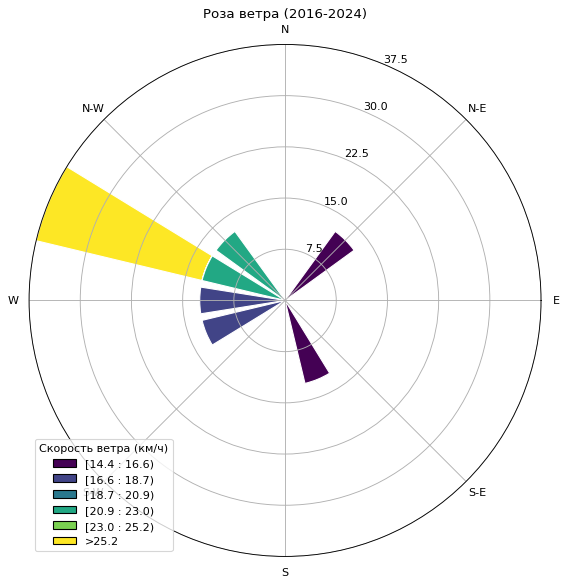

In [ ]:
from windrose import WindroseAxes
import matplotlib.pyplot as plt

# Фильтрация данных по периоду с 1 января 2008 года по 1 января 2016 года
filtered_wind_data = wind_data.loc['2016-01-01':'2024-01-01']

# Создание нового графика с розой ветра
ax = WindroseAxes.from_ax()
ax.bar(filtered_wind_data['winddir'], filtered_wind_data['windspeed'], normed=True, opening=0.8, edgecolor='white')

# Добавление легенды
ax.legend(title='Скорость ветра (км/ч)')

# Отображение розы ветра
plt.title('Роза ветра (2016-2024)')
plt.show()


In [ ]:
pip install cartopy

## Анализ осадков и их типов

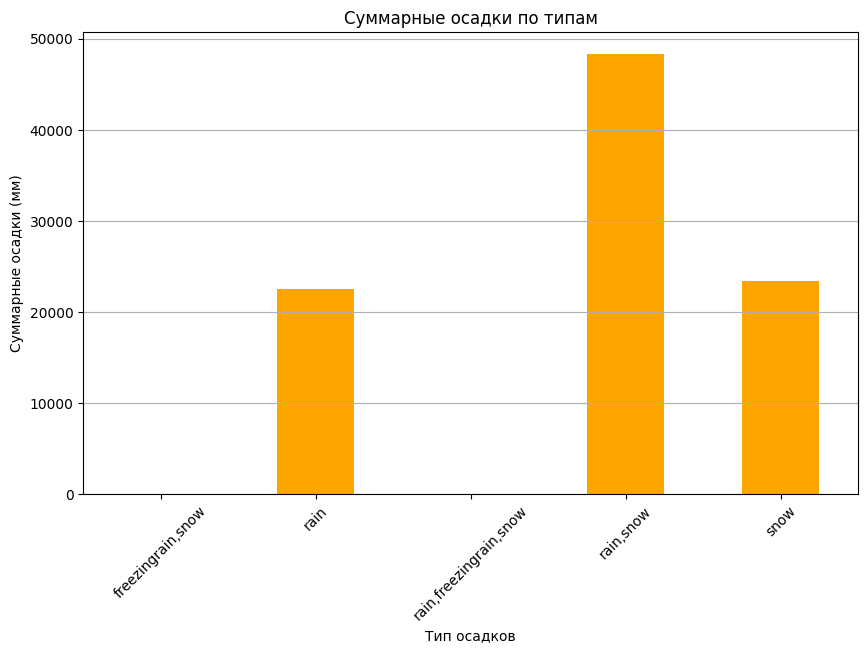

In [ ]:
# Извлечение необходимых столбцов о осадках и их типах
precip_data = df_1[['precip', 'preciptype']]

# Рассчитываем суммарные осадки по типам
total_precip_by_type = precip_data.groupby('preciptype')['precip'].sum()

# Визуализация суммарных осадков по типам
plt.figure(figsize=(10, 6))
total_precip_by_type.plot(kind='bar', color='orange')
plt.title('Суммарные осадки по типам')
plt.xlabel('Тип осадков')
plt.ylabel('Суммарные осадки (мм)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


## Изучение влияния погоды на видимость и солнечную радиацию

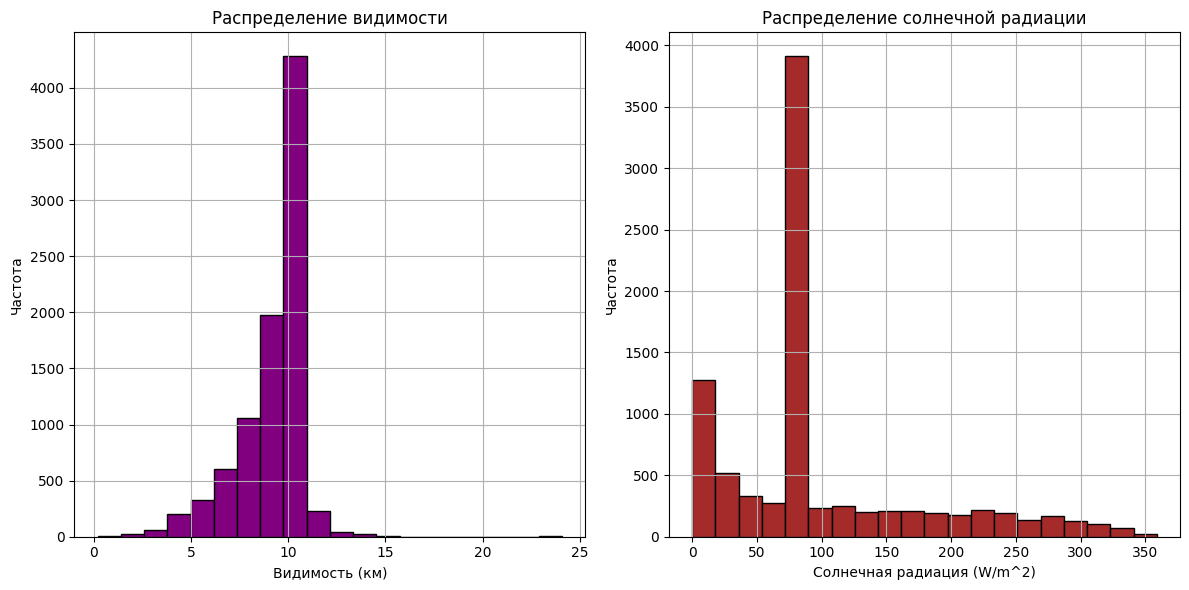

In [ ]:
# Извлечение данных о видимости и солнечной радиации
visibility_data = df_1['visibility']
solar_radiation_data = df_1['solarradiation']

# Визуализация распределения видимости и солнечной радиации
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
visibility_data.plot.hist(color='purple', bins=20, edgecolor='black')
plt.title('Распределение видимости')
plt.xlabel('Видимость (км)')
plt.ylabel('Частота')
plt.grid(True)

plt.subplot(1, 2, 2)
solar_radiation_data.plot.hist(color='brown', bins=20, edgecolor='black')
plt.title('Распределение солнечной радиации')
plt.xlabel('Солнечная радиация (W/m^2)')
plt.ylabel('Частота')
plt.grid(True)

plt.tight_layout()
plt.show()


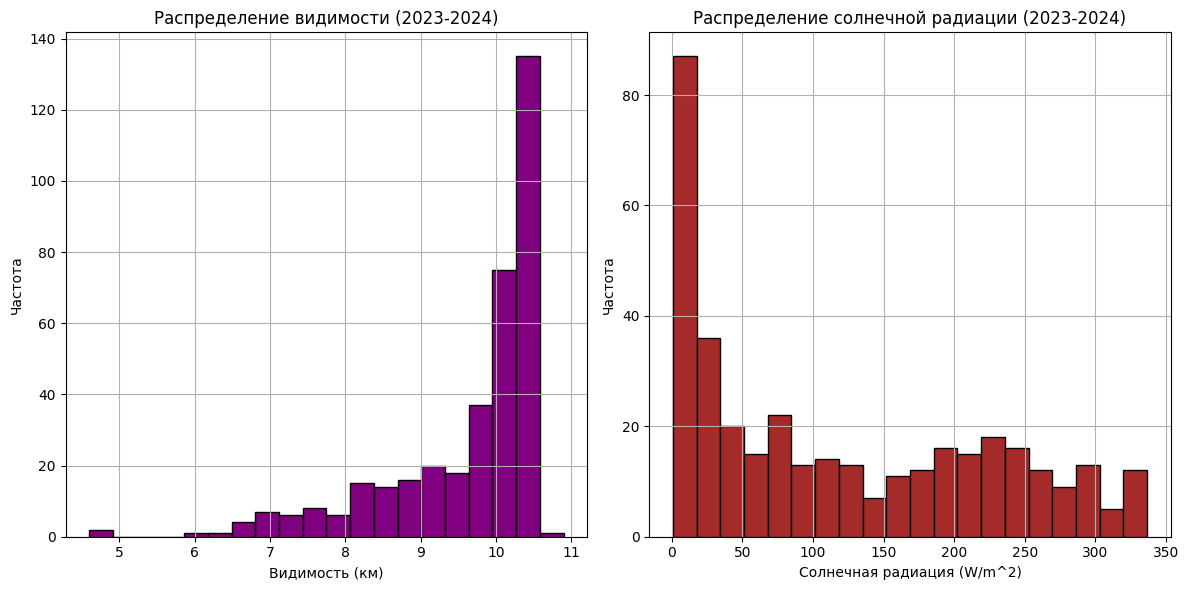

In [ ]:
# Выбор данных за определенный период
start_date = '2023-01-01'
end_date = '2024-01-01'
period_visibility_data = df_1.loc[start_date:end_date, 'visibility']
period_solar_radiation_data = df_1.loc[start_date:end_date, 'solarradiation']

# Визуализация распределения видимости и солнечной радиации за выбранный период
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
period_visibility_data.plot.hist(color='purple', bins=20, edgecolor='black')
plt.title('Распределение видимости (2023-2024)')
plt.xlabel('Видимость (км)')
plt.ylabel('Частота')
plt.grid(True)

plt.subplot(1, 2, 2)
period_solar_radiation_data.plot.hist(color='brown', bins=20, edgecolor='black')
plt.title('Распределение солнечной радиации (2023-2024)')
plt.xlabel('Солнечная радиация (W/m^2)')
plt.ylabel('Частота')
plt.grid(True)

plt.tight_layout()
plt.show()


## Прогнозирование

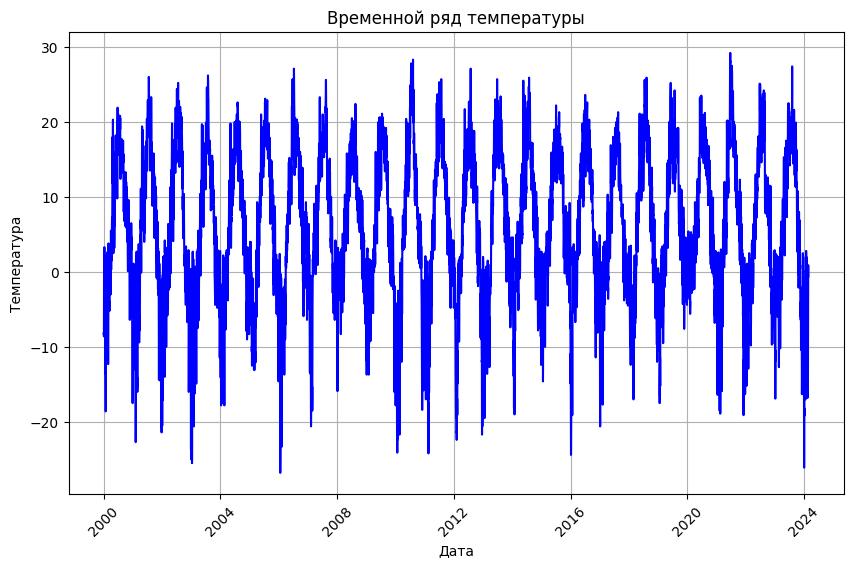

In [ ]:
import matplotlib.pyplot as plt

# Построение графика временного ряда
plt.figure(figsize=(10, 6))
plt.plot(df['datetime'], df['temp'], color='blue')
plt.title('Временной ряд температуры')
plt.xlabel('Дата')
plt.ylabel('Температура')
plt.xticks(rotation=45)  # Поворачиваем подписи по оси X для удобства чтения
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Пример обучающих признаков: tempmax, tempmin, feelslikemax, feelslikemin, humidity
# Целевая переменная: temp (средняя температура)

# Разделение данных на обучающий и тестовый наборы
X = df[['tempmax', 'tempmin', 'feelslikemax', 'feelslikemin', 'humidity']]
y = df['temp']
# Разделение данных на обучающий и тестовый наборы (например, 80% на обучение, 20% на тест)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Mean Squared Error (Linear Regression): 0.34768172657430074


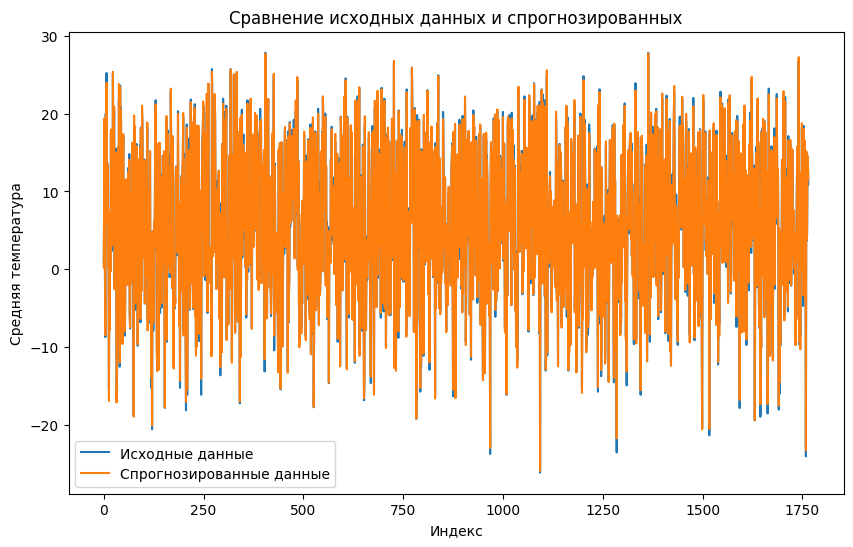

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# Создаем и обучаем модель линейной регрессии
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Прогнозирование на тестовом наборе данных
y_pred = linear_model.predict(X_test)

# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (Linear Regression):', mse)

# Спрогнозированные данные
predicted_data = linear_model.predict(X_test)

# Построение графика для сравнения исходных данных и спрогнозированных
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Исходные данные')
plt.plot(predicted_data, label='Спрогнозированные данные')
plt.title('Сравнение исходных данных и спрогнозированных')
plt.xlabel('Индекс')
plt.ylabel('Средняя температура')
plt.legend()
plt.show()


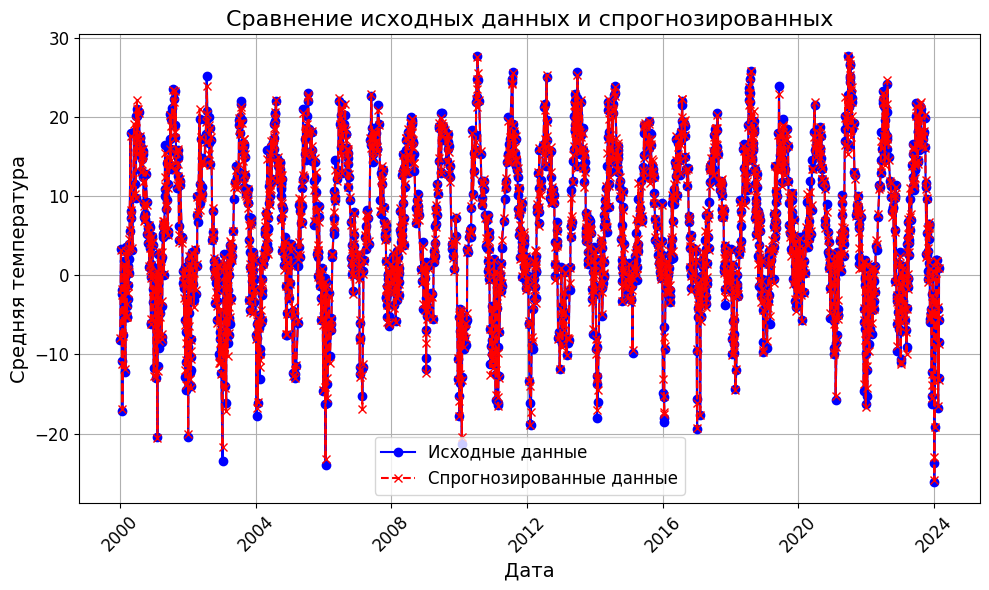

In [ ]:
import matplotlib.pyplot as plt

# Получаем даты из исходного набора данных для соответствующих индексов тестового набора
test_dates = df.loc[X_test.index, 'datetime']

# Сортируем данные по дате
sorted_indices = test_dates.argsort()
test_dates = test_dates.iloc[sorted_indices]
y_test_sorted = y_test.iloc[sorted_indices]
predicted_data_sorted = predicted_data[sorted_indices]

# Построение графика для сравнения исходных данных и спрогнозированных
plt.figure(figsize=(10, 6))

# Исходные данные
plt.plot(test_dates, y_test_sorted.values, label='Исходные данные', color='blue', linestyle='-', marker='o')

# Спрогнозированные данные
plt.plot(test_dates, predicted_data_sorted, label='Спрогнозированные данные', color='red', linestyle='--', marker='x')

# Настройки графика
plt.title('Сравнение исходных данных и спрогнозированных', fontsize=16)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Средняя температура', fontsize=14)
plt.xticks(rotation=45, fontsize=12)  # Поворачиваем подписи на оси X на 45 градусов и устанавливаем размер шрифта
plt.yticks(fontsize=12)  # Устанавливаем размер шрифта для меток на оси Y
plt.legend(fontsize=12)  # Устанавливаем размер шрифта для легенды
plt.grid(True)  # Включаем сетку
plt.tight_layout()  # Улучшаем размещение элементов графика
plt.show()


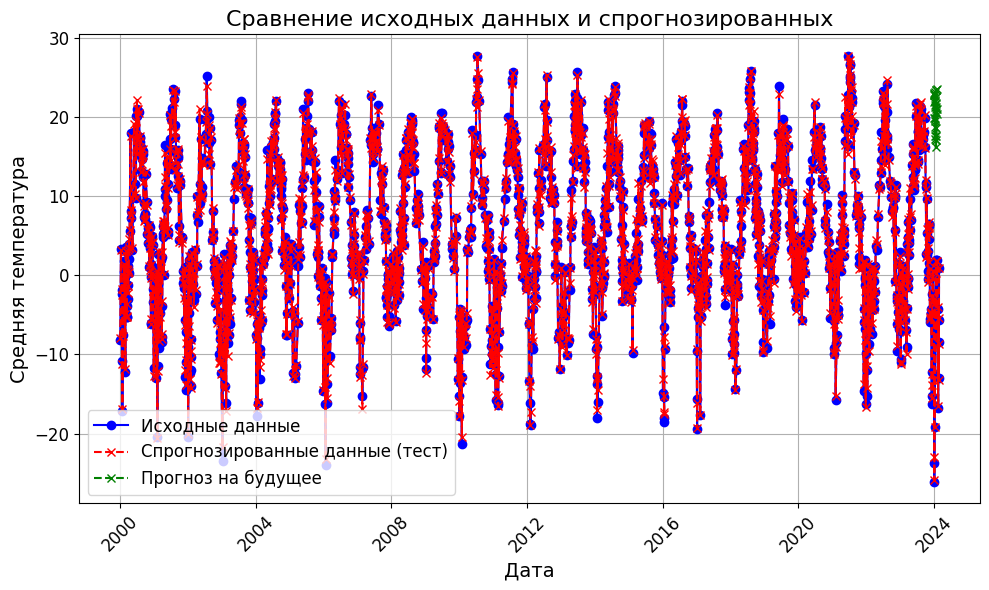

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Пример обучающих признаков: tempmax, tempmin, feelslikemax, feelslikemin, humidity
# Целевая переменная: temp (средняя температура)

# Разделение данных на обучающий и тестовый наборы
X = df[['tempmax', 'tempmin', 'feelslikemax', 'feelslikemin', 'humidity']]
y = df['temp']

# Разделение данных на обучающий и тестовый наборы (например, 80% на обучение, 20% на тест)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Прогноз на тестовом наборе данных
predicted_data = model.predict(X_test)

# Прогноз на будущий период
# Предположим, что у нас есть будущие значения признаков для прогноза
future_dates = pd.date_range(start='2024-01-01', periods=30, freq='D')
future_data = pd.DataFrame({
    'tempmax': np.random.rand(30) * 10 + 20,  # Пример данных, замените на реальные данные
    'tempmin': np.random.rand(30) * 10 + 10,
    'feelslikemax': np.random.rand(30) * 10 + 20,
    'feelslikemin': np.random.rand(30) * 10 + 10,
    'humidity': np.random.rand(30) * 10 + 60
})

future_predictions = model.predict(future_data)

# Получаем даты из исходного набора данных для соответствующих индексов тестового набора
test_dates = df.loc[X_test.index, 'datetime']

# Сортируем данные по дате
sorted_indices = test_dates.argsort()
test_dates = test_dates.iloc[sorted_indices]
y_test_sorted = y_test.iloc[sorted_indices]
predicted_data_sorted = predicted_data[sorted_indices]

# Построение графика для сравнения исходных данных и спрогнозированных на тестовом наборе
plt.figure(figsize=(10, 6))

# Исходные данные
plt.plot(test_dates, y_test_sorted.values, label='Исходные данные', color='blue', linestyle='-', marker='o')

# Спрогнозированные данные на тестовом наборе
plt.plot(test_dates, predicted_data_sorted, label='Спрогнозированные данные (тест)', color='red', linestyle='--', marker='x')

# Прогноз на будущий период
plt.plot(future_dates, future_predictions, label='Прогноз на будущее', color='green', linestyle='--', marker='x')

# Настройки графика
plt.title('Сравнение исходных данных и спрогнозированных', fontsize=16)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Средняя температура', fontsize=14)
plt.xticks(rotation=45, fontsize=12) # Поворачиваем подписи на оси X на 45 градусов и устанавливаем размер шрифта
plt.yticks(fontsize=12) # Устанавливаем размер шрифта для меток на оси Y
plt.legend(fontsize=12) # Устанавливаем размер шрифта для легенды
plt.grid(True) # Включаем сетку
plt.tight_layout() # Улучшаем размещение элементов графика
plt.show()


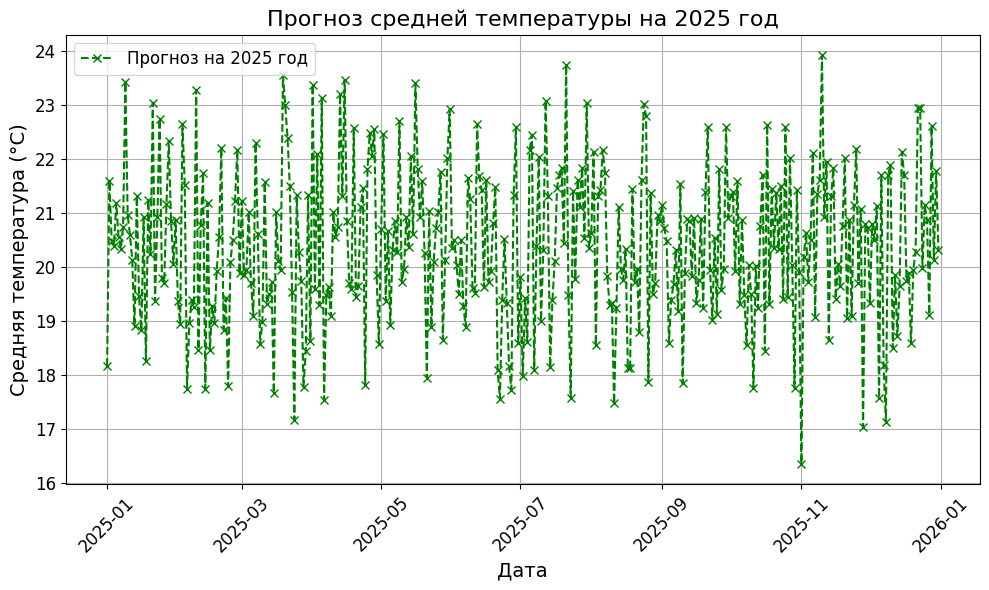

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Пример обучающих признаков: tempmax, tempmin, feelslikemax, feelslikemin, humidity
# Целевая переменная: temp (средняя температура)

# Разделение данных на обучающий и тестовый наборы
X = df[['tempmax', 'tempmin', 'feelslikemax', 'feelslikemin', 'humidity']]
y = df['temp']

# Разделение данных на обучающий и тестовый наборы (например, 80% на обучение, 20% на тест)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели (RandomForestRegressor в данном случае)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Прогноз на тестовом наборе данных
predicted_data = model.predict(X_test)

# Прогноз на будущий период (например, 2025 год)
# Предположим, что у нас есть будущие значения признаков для прогноза
future_dates = pd.date_range(start='2025-01-01', end='2025-12-31', freq='D')
future_data = pd.DataFrame({
    'tempmax': np.random.rand(len(future_dates)) * 10 + 20,  # Пример данных, замените на реальные данные
    'tempmin': np.random.rand(len(future_dates)) * 10 + 10,
    'feelslikemax': np.random.rand(len(future_dates)) * 10 + 20,
    'feelslikemin': np.random.rand(len(future_dates)) * 10 + 10,
    'humidity': np.random.rand(len(future_dates)) * 10 + 60
}, index=future_dates)

# Прогнозирование будущих значений
future_predictions = model.predict(future_data)

# Построение графика для прогноза на будущий период
plt.figure(figsize=(10, 6))

# Прогноз на будущий период
plt.plot(future_dates, future_predictions, label='Прогноз на 2025 год', color='green', linestyle='--', marker='x')

# Настройки графика
plt.title('Прогноз средней температуры на 2025 год', fontsize=16)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Средняя температура (°C)', fontsize=14)
plt.xticks(rotation=45, fontsize=12) # Поворачиваем подписи на оси X на 45 градусов и устанавливаем размер шрифта
plt.yticks(fontsize=12) # Устанавливаем размер шрифта для меток на оси Y
plt.legend(fontsize=12) # Устанавливаем размер шрифта для легенды
plt.grid(True) # Включаем сетку
plt.tight_layout() # Улучшаем размещение элементов графика
plt.show()
